In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings

warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel("Company_Data2015-1.xlsx")

df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
df.describe().T.tail(36)

,count,mean,std,min,25%,50%,75%,max
CEPS (annualised) (Unit Curr),3586.0,36.018709,828.420796,-1808.00,0.0000,1.145,8.7725,45438.44
Cash Flow From Operating Activities,3586.0,65.770750,1455.048376,-25469.23,-0.3075,0.450,12.6475,44529.40
Cash Flow From Investing Activities,3586.0,-60.870365,701.974713,-23843.45,-5.1175,-0.120,0.1200,3732.98
Cash Flow From Financing Activities,3586.0,11.436453,1272.257361,-38374.04,-5.8475,0.000,0.4575,28846.00
ROG-Net Worth (%),3586.0,1237.624576,41041.930017,-14485.71,-1.4875,1.840,11.3625,2144020.00
ROG-Capital Employed (%),3586.0,2988.884612,126472.870285,-8614.63,-3.8350,1.375,12.5875,7412700.00
ROG-Gross Block (%),3586.0,37.554306,893.619402,-116.12,0.0000,0.250,6.7200,47400.00
ROG-Gross Sales (%),3586.0,242.672962,6103.527897,-5503.70,-8.0775,3.310,21.5250,320200.00
ROG-Net Sales (%),3586.0,242.588530,6103.487655,-5503.70,-8.1175,3.205,21.5675,320200.00
ROG-Cost of Production (%),3586.0,310.488405,5573.215095,-2130.23,-7.2425,4.415,23.1225,267150.00


In [4]:
df.columns =df.columns.str.replace(' ', '').str.replace('_', '').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', 'to').str.replace('-', '').str.replace('[', '').str.replace(']', '').str.replace('.', '')

In [5]:
df.head()

,CoCode,CoName,NetworthNextYear,EquityPaidUp,Networth,CapitalEmployed,TotalDebt,GrossBlock,NetWorkingCapital,CurrentAssets,...,PBIDTMpercLatest,PBITMpercLatest,PBDTMpercLatest,CPMpercLatest,APATMpercLatest,DebtorsVelocityDays,CreditorsVelocityDays,InventoryVelocityDays,ValueofOutputtoTotalAssets,ValueofOutputtoGrossBlock
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [6]:
df['Capitalexpensesinforex'].describe()

count    3586.000000
mean        7.655689
std       111.432070
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3722.100000
Name: Capitalexpensesinforex, dtype: float64

In [7]:
df.tail()

,CoCode,CoName,NetworthNextYear,EquityPaidUp,Networth,CapitalEmployed,TotalDebt,GrossBlock,NetWorkingCapital,CurrentAssets,...,PBIDTMpercLatest,PBITMpercLatest,PBDTMpercLatest,CPMpercLatest,APATMpercLatest,DebtorsVelocityDays,CreditorsVelocityDays,InventoryVelocityDays,ValueofOutputtoTotalAssets,ValueofOutputtoGrossBlock
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CoCode                           3586 non-null   int64  
 1   CoName                           3586 non-null   object 
 2   NetworthNextYear                 3586 non-null   float64
 3   EquityPaidUp                     3586 non-null   float64
 4   Networth                         3586 non-null   float64
 5   CapitalEmployed                  3586 non-null   float64
 6   TotalDebt                        3586 non-null   float64
 7   GrossBlock                       3586 non-null   float64
 8   NetWorkingCapital                3586 non-null   float64
 9   CurrentAssets                    3586 non-null   float64
 10  CurrentLiabilitiesandProvisions  3586 non-null   float64
 11  TotalAssetstoLiabilities         3586 non-null   float64
 12  GrossSales          

In [10]:
print("No.Of Duplicate Rows",df.duplicated().sum())

No.Of Duplicate Rows 0


In [11]:
df.describe()

,CoCode,NetworthNextYear,EquityPaidUp,Networth,CapitalEmployed,TotalDebt,GrossBlock,NetWorkingCapital,CurrentAssets,CurrentLiabilitiesandProvisions,...,PBIDTMpercLatest,PBITMpercLatest,PBDTMpercLatest,CPMpercLatest,APATMpercLatest,DebtorsVelocityDays,CreditorsVelocityDays,InventoryVelocityDays,ValueofOutputtoTotalAssets,ValueofOutputtoGrossBlock
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [12]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe()

,CoCode,NetworthNextYear,EquityPaidUp,Networth,CapitalEmployed,TotalDebt,GrossBlock,NetWorkingCapital,CurrentAssets,CurrentLiabilitiesandProvisions,...,PBIDTMpercLatest,PBITMpercLatest,PBDTMpercLatest,CPMpercLatest,APATMpercLatest,DebtorsVelocityDays,CreditorsVelocityDays,InventoryVelocityDays,ValueofOutputtoTotalAssets,ValueofOutputtoGrossBlock
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [13]:
df.shape

(3586, 67)

In [14]:
df['default'] = np.where((df['NetworthNextYear'] > 0), 0, 1)

In [15]:
df[['default','NetworthNextYear']].head(10)

,default,NetworthNextYear
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [16]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [17]:
df['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [18]:
df.isnull().sum()

CoCode                          0
CoName                          0
NetworthNextYear                0
EquityPaidUp                    0
Networth                        0
                             ... 
CreditorsVelocityDays           0
InventoryVelocityDays         103
ValueofOutputtoTotalAssets      0
ValueofOutputtoGrossBlock       0
default                         0
Length: 68, dtype: int64

In [19]:
df.size

243848

In [20]:
df.isnull().sum().sum()

118

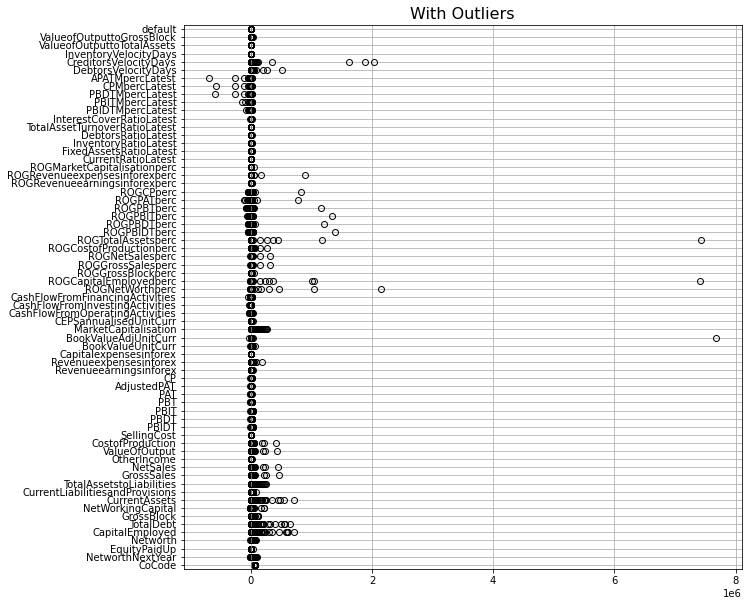

In [21]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [22]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [23]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [24]:
((df_X > UL) | (df_X < LL)).sum()

APATMpercLatest               933
AdjustedPAT                   954
BookValueAdjUnitCurr          486
BookValueUnitCurr             485
CEPSannualisedUnitCurr        602
                             ... 
TotalAssetstoLiabilities      574
TotalDebt                     583
ValueOfOutput                 559
ValueofOutputtoGrossBlock     481
ValueofOutputtoTotalAssets    150
Length: 67, dtype: int64

In [25]:
df_X.size

240262

In [26]:
(((df_X > UL) | (df_X < LL)).sum()).sum() 

42322

In [27]:
(42322/240262)*100

17.614937027078774

In [28]:
Q1 = df_X.quantile(0.05)
Q3 = df_X.quantile(0.95)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [29]:
((df_X > UL) | (df_X < LL)).sum()

APATMpercLatest               109
AdjustedPAT                   133
BookValueAdjUnitCurr           60
BookValueUnitCurr              70
CEPSannualisedUnitCurr         70
                             ... 
TotalAssetstoLiabilities       95
TotalDebt                     101
ValueOfOutput                  83
ValueofOutputtoGrossBlock     107
ValueofOutputtoTotalAssets     26
Length: 67, dtype: int64

In [30]:
df_X.size

240262

In [31]:
(((df_X > UL) | (df_X < LL)).sum()).sum() 

6075

In [32]:
(6075/240262)*100

2.52848973204252

### Capping the outlier to 5 and 95th percentile

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[5,95])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for i in df_X.columns:
    if ((df_X[i].dtype=="int64") or (df_X[i].dtype=="float64")):
        LL,UL=remove_outlier(df_X[i])
        df_X[i]=np.where(df_X[i]>UL,UL,df_X[i])
        df_X[i]=np.where(df_X[i]<LL,LL,df_X[i])

In [35]:
Q1 = df_X.quantile(0.05)
Q3 = df_X.quantile(0.95)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

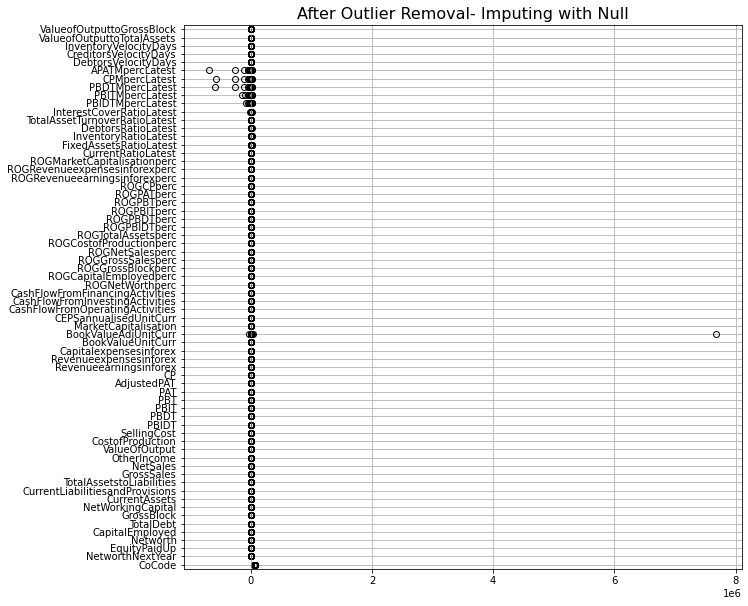

In [36]:
plt.figure(figsize=(10,10))
df_X.boxplot(vert=0)
plt.title('After Outlier Removal- Imputing with Null',fontsize=16)
plt.show()

In [37]:
((df_X > UL) | (df_X < LL)).sum()

APATMpercLatest               109
AdjustedPAT                     0
BookValueAdjUnitCurr           60
BookValueUnitCurr               0
CEPSannualisedUnitCurr          0
                             ... 
TotalAssetstoLiabilities        0
TotalDebt                       0
ValueOfOutput                   0
ValueofOutputtoGrossBlock       0
ValueofOutputtoTotalAssets      0
Length: 67, dtype: int64

In [38]:
df_X.size

240262

In [39]:
(((df_X > UL) | (df_X < LL)).sum()).sum() 

1111

In [40]:
(1111/240262)*100

0.46241186704514237

### Replacing the remaining outliers as null

In [41]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [42]:
(((df_X > UL) | (df_X < LL)).sum()).sum() 

0

In [43]:
df_X.isnull().sum()

CoCode                          0
CoName                          0
NetworthNextYear                0
EquityPaidUp                    0
Networth                        0
                             ... 
DebtorsVelocityDays             0
CreditorsVelocityDays           0
InventoryVelocityDays         134
ValueofOutputtoTotalAssets      0
ValueofOutputtoGrossBlock       0
Length: 67, dtype: int64

In [44]:
df_X.isnull().sum().sum()

1229

In [45]:
df_X=df_X.drop([ 'NetworthNextYear'], axis = 1)

In [46]:
df_X=df_X.drop([ 'CoName'], axis = 1)

In [47]:
(df_X.isnull().sum().sort_values(ascending=False)/df_X.index.size).head(60)

InventoryVelocityDays             0.04
InterestCoverRatioLatest          0.03
APATMpercLatest                   0.03
CPMpercLatest                     0.03
PBITMpercLatest                   0.03
PBDTMpercLatest                   0.03
PBIDTMpercLatest                  0.03
FixedAssetsRatioLatest            0.03
InventoryRatioLatest              0.03
DebtorsRatioLatest                0.02
BookValueAdjUnitCurr              0.02
CurrentRatioLatest                0.02
TotalAssetTurnoverRatioLatest     0.01
ROGPBTperc                        0.00
ROGNetSalesperc                   0.00
ROGGrossSalesperc                 0.00
ROGCostofProductionperc           0.00
ROGGrossBlockperc                 0.00
ROGTotalAssetsperc                0.00
ROGPBIDTperc                      0.00
ROGPBDTperc                       0.00
ROGPBITperc                       0.00
CoCode                            0.00
ROGPATperc                        0.00
ROGCPperc                         0.00
ROGRevenueearningsinforex

In [48]:
# df_X=df_X.drop([ 'ROGRevenueearningsinforexperc'], axis = 1)
# df_X=df_X.drop([ 'ROGRevenueexpensesinforexperc'], axis = 1)
# df_X=df_X.drop([ 'Capitalexpensesinforex'], axis = 1)

In [49]:
df_X.shape

(3586, 65)

In [50]:
df = pd.concat([df_X, df_Y], axis =1 )

In [51]:
df.shape

(3586, 66)

In [52]:
df.isnull().sum().sum()

1229

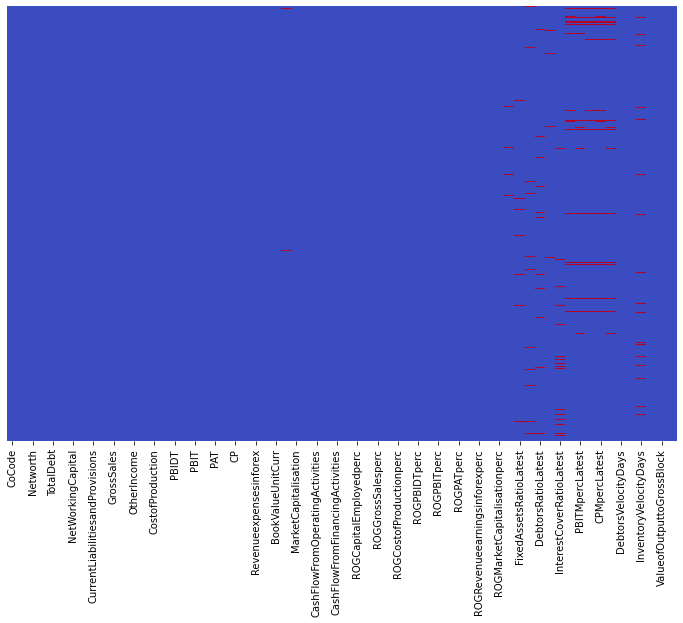

In [53]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [54]:
df.isnull().sum(axis = 1)

0       0
1       1
2       5
3       1
4       4
       ..
3581    1
3582    0
3583    0
3584    0
3585    1
Length: 3586, dtype: int64

In [55]:
df_X = df.drop('default', axis = 1)
df_Y =df['default']

In [56]:
df_Y.isnull().sum()

0

In [57]:
df2 = pd.concat([df_X ,df_Y ], axis = 1)

In [58]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [59]:
imputer = KNNImputer(n_neighbors=5,)

In [60]:
df2= pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [61]:
df2.isnull().sum().sum()

0

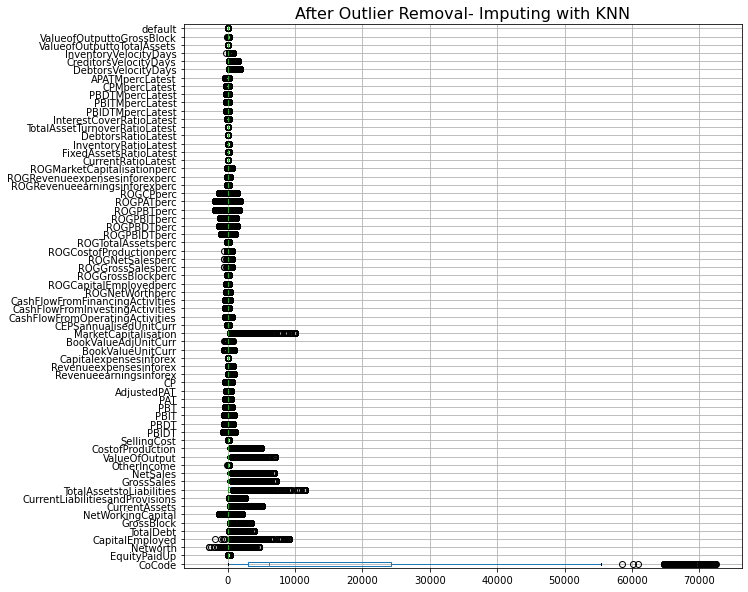

In [62]:
plt.figure(figsize=(10,10))
df2.boxplot(vert=0)
plt.title('After Outlier Removal- Imputing with KNN',fontsize=16)
plt.show()

# univariate analysis

In [63]:
def univariateAnalysis(column):
    plt.figure()
    print("Histogram of "+column)
    sns.distplot(df2[column],kde=True,color='g',norm_hist=True);
    plt.show()

In [64]:
df2=df2.select_dtypes(include=['float64','int64'])
lstnumericcolumns=list(df2.columns)
len(lstnumericcolumns)

66

In [65]:
df2.columns

Index(['CoCode', 'EquityPaidUp', 'Networth', 'CapitalEmployed', 'TotalDebt',
       'GrossBlock', 'NetWorkingCapital', 'CurrentAssets',
       'CurrentLiabilitiesandProvisions', 'TotalAssetstoLiabilities',
       'GrossSales', 'NetSales', 'OtherIncome', 'ValueOfOutput',
       'CostofProduction', 'SellingCost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'AdjustedPAT', 'CP', 'Revenueearningsinforex',
       'Revenueexpensesinforex', 'Capitalexpensesinforex', 'BookValueUnitCurr',
       'BookValueAdjUnitCurr', 'MarketCapitalisation',
       'CEPSannualisedUnitCurr', 'CashFlowFromOperatingActivities',
       'CashFlowFromInvestingActivities', 'CashFlowFromFinancingActivities',
       'ROGNetWorthperc', 'ROGCapitalEmployedperc', 'ROGGrossBlockperc',
       'ROGGrossSalesperc', 'ROGNetSalesperc', 'ROGCostofProductionperc',
       'ROGTotalAssetsperc', 'ROGPBIDTperc', 'ROGPBDTperc', 'ROGPBITperc',
       'ROGPBTperc', 'ROGPATperc', 'ROGCPperc',
       'ROGRevenueearningsinforexperc', 'ROG

Histogram of CoCode


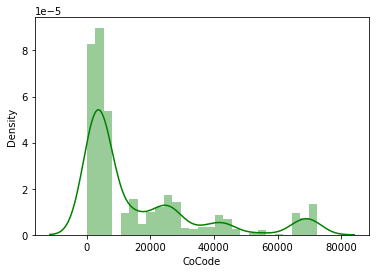

Histogram of EquityPaidUp


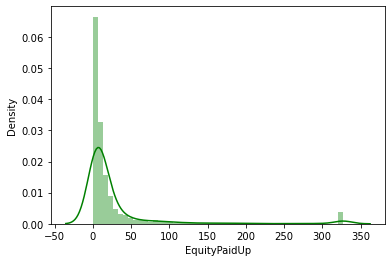

Histogram of Networth


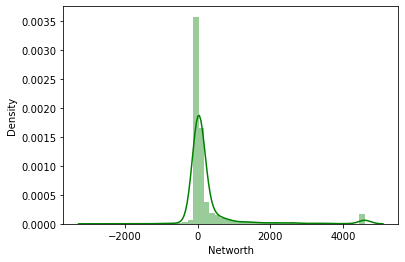

Histogram of CapitalEmployed


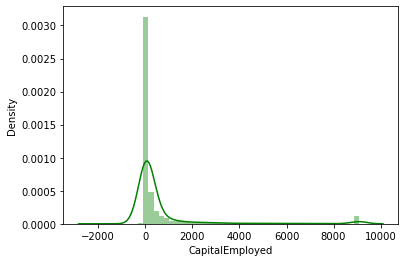

Histogram of TotalDebt


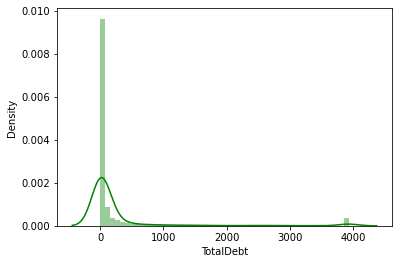

Histogram of GrossBlock


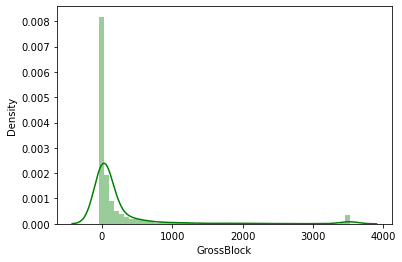

Histogram of NetWorkingCapital


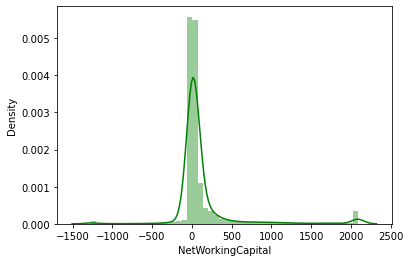

Histogram of CurrentAssets


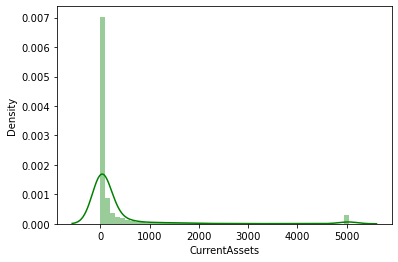

Histogram of CurrentLiabilitiesandProvisions


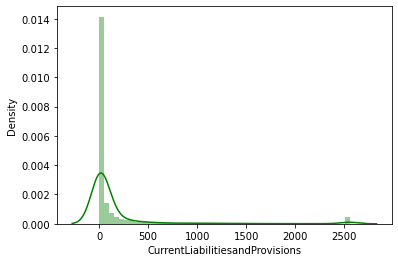

Histogram of TotalAssetstoLiabilities


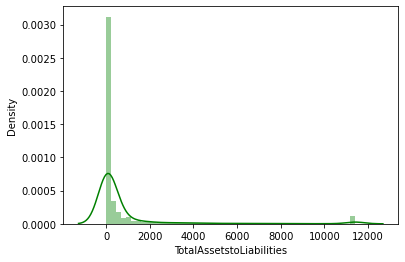

Histogram of GrossSales


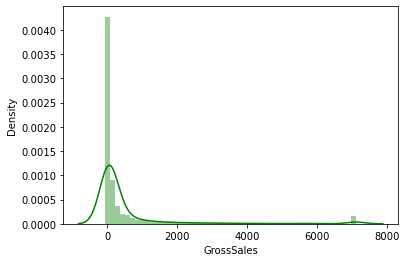

Histogram of NetSales


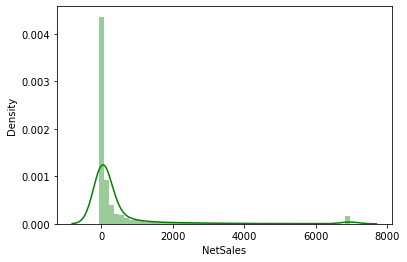

Histogram of OtherIncome


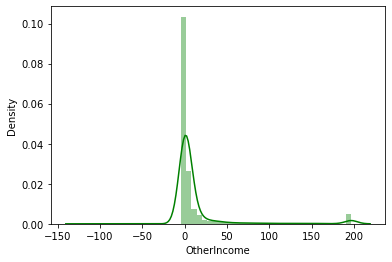

Histogram of ValueOfOutput


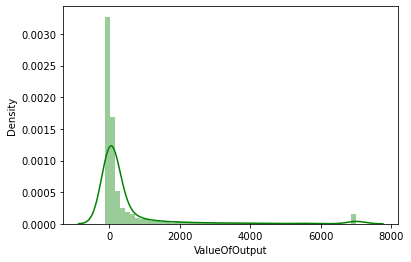

Histogram of CostofProduction


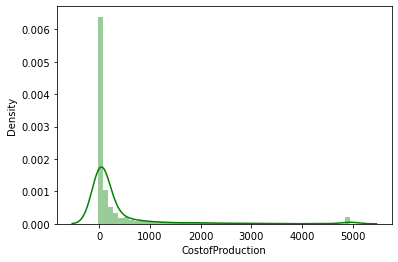

Histogram of SellingCost


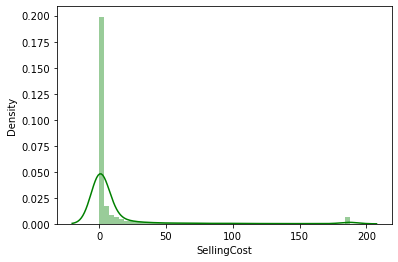

Histogram of PBIDT


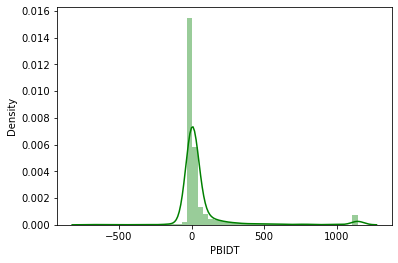

Histogram of PBDT


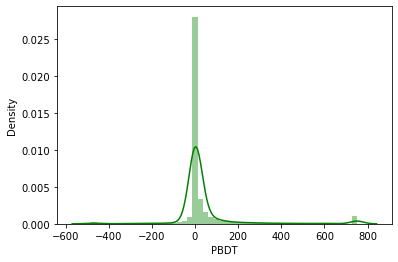

Histogram of PBIT


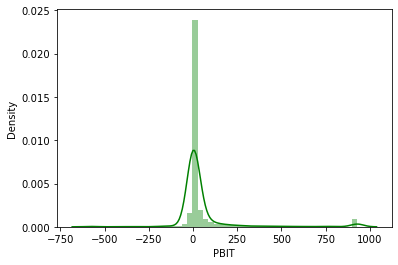

Histogram of PBT


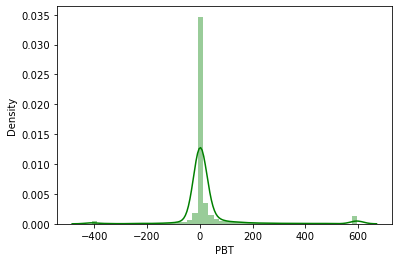

Histogram of PAT


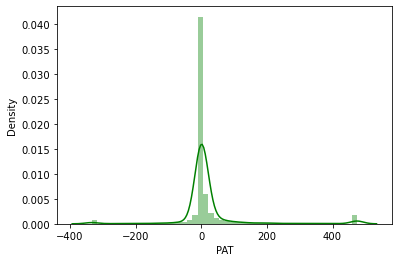

Histogram of AdjustedPAT


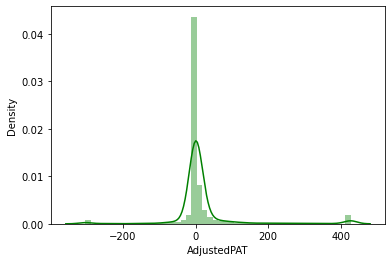

Histogram of CP


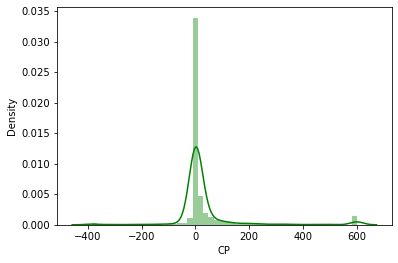

Histogram of Revenueearningsinforex


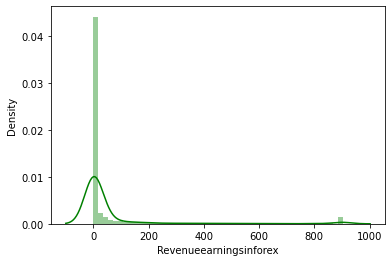

Histogram of Revenueexpensesinforex


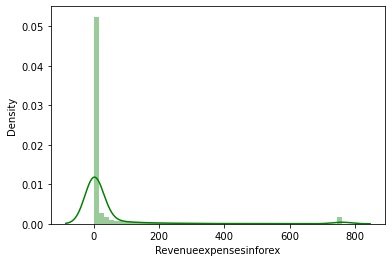

Histogram of Capitalexpensesinforex


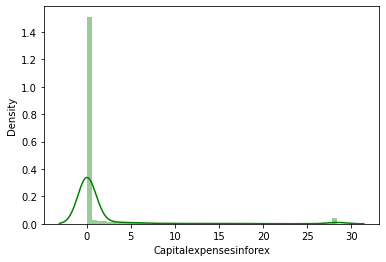

Histogram of BookValueUnitCurr


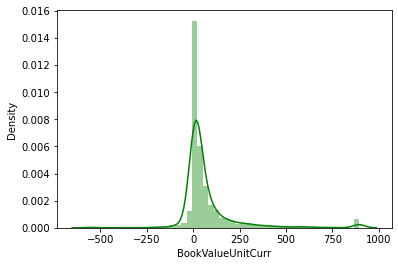

Histogram of BookValueAdjUnitCurr


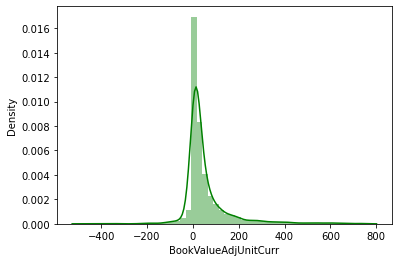

Histogram of MarketCapitalisation


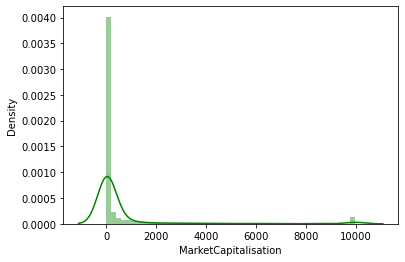

Histogram of CEPSannualisedUnitCurr


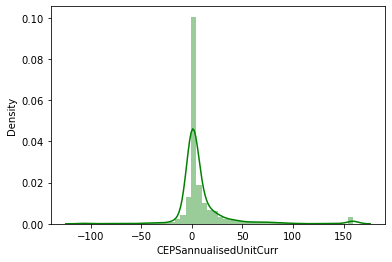

Histogram of CashFlowFromOperatingActivities


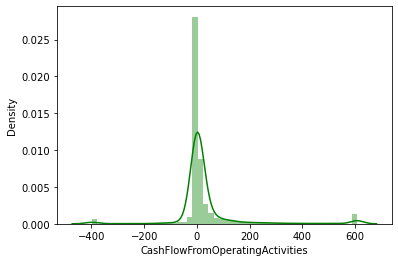

Histogram of CashFlowFromInvestingActivities


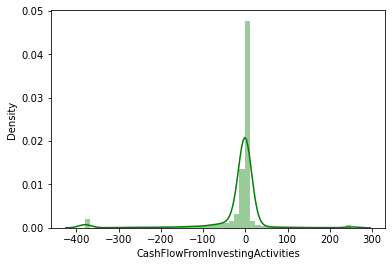

Histogram of CashFlowFromFinancingActivities


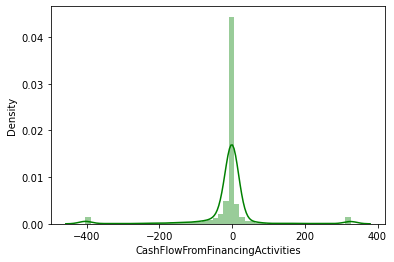

Histogram of ROGNetWorthperc


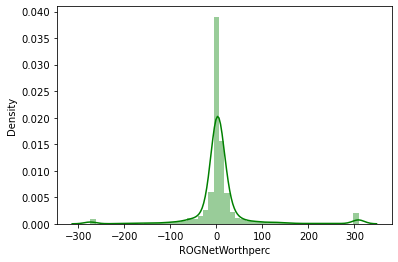

Histogram of ROGCapitalEmployedperc


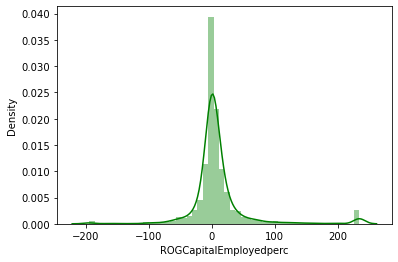

Histogram of ROGGrossBlockperc


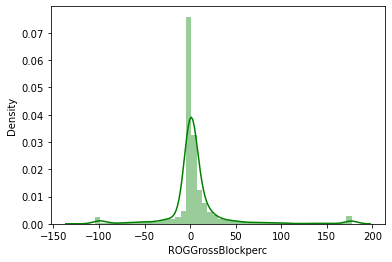

Histogram of ROGGrossSalesperc


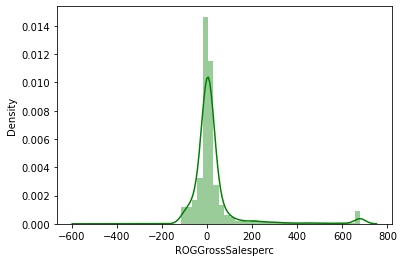

Histogram of ROGNetSalesperc


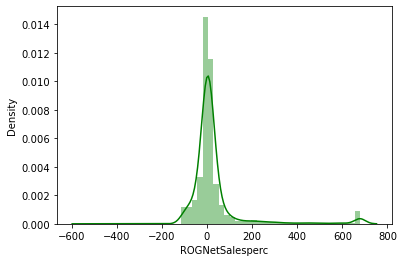

Histogram of ROGCostofProductionperc


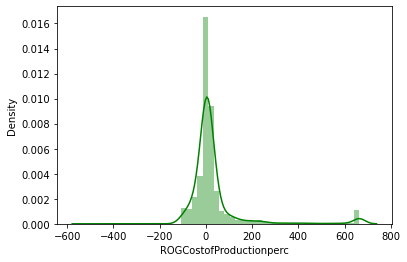

Histogram of ROGTotalAssetsperc


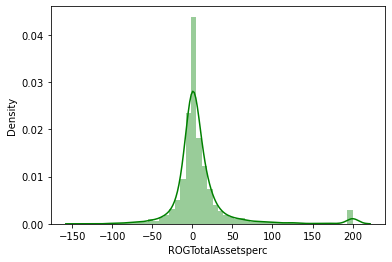

Histogram of ROGPBIDTperc


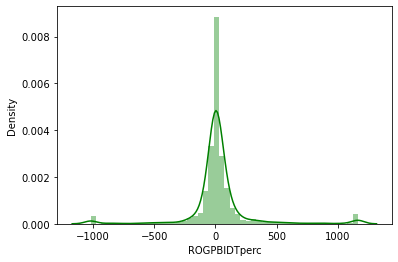

Histogram of ROGPBDTperc


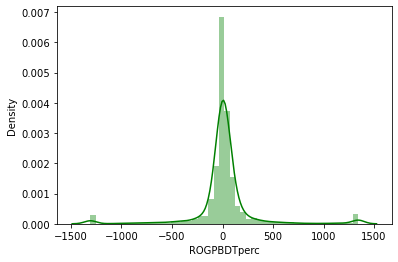

Histogram of ROGPBITperc


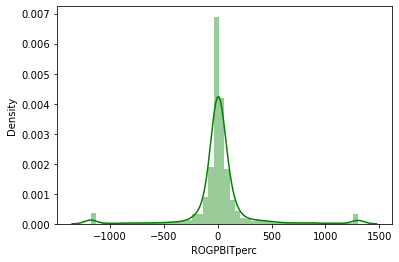

Histogram of ROGPBTperc


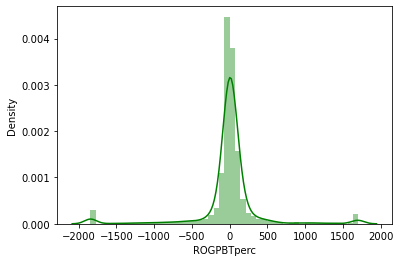

Histogram of ROGPATperc


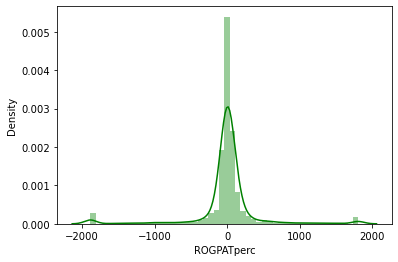

Histogram of ROGCPperc


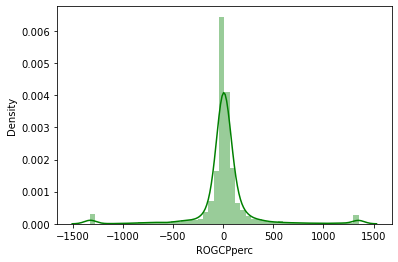

Histogram of ROGRevenueearningsinforexperc


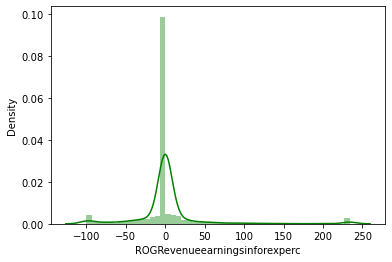

Histogram of ROGRevenueexpensesinforexperc


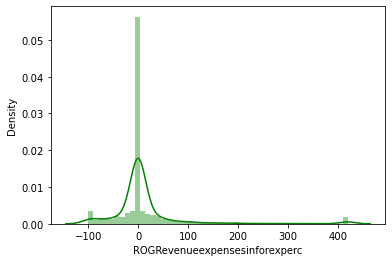

Histogram of ROGMarketCapitalisationperc


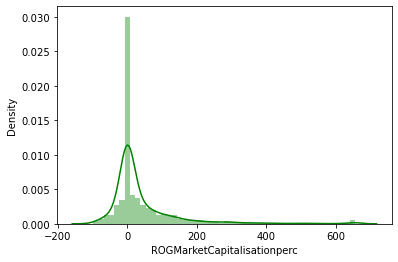

Histogram of CurrentRatioLatest


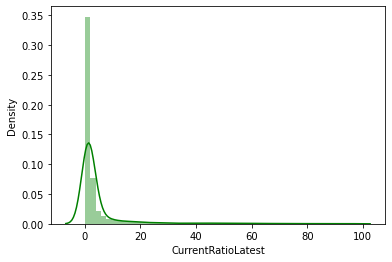

Histogram of FixedAssetsRatioLatest


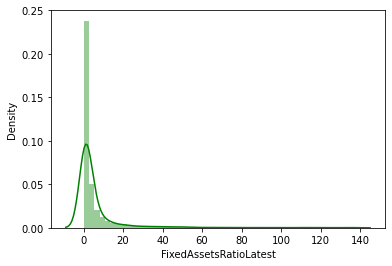

Histogram of InventoryRatioLatest


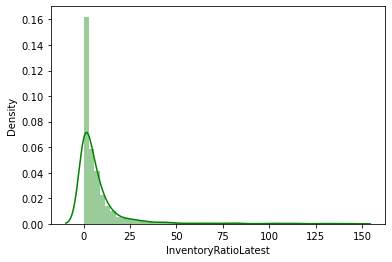

Histogram of DebtorsRatioLatest


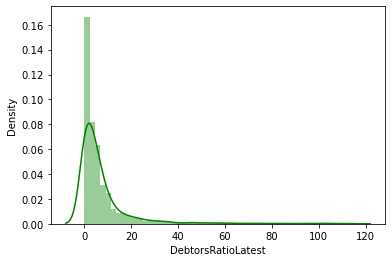

Histogram of TotalAssetTurnoverRatioLatest


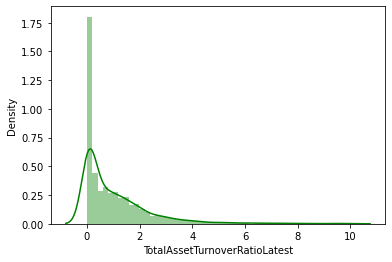

Histogram of InterestCoverRatioLatest


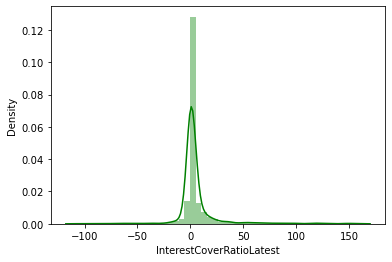

Histogram of PBIDTMpercLatest


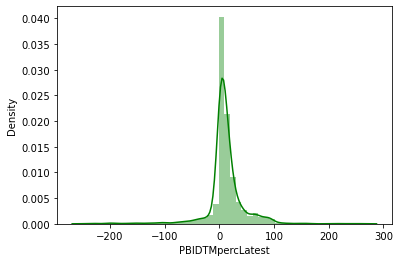

Histogram of PBITMpercLatest


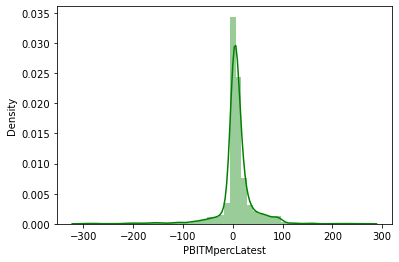

Histogram of PBDTMpercLatest


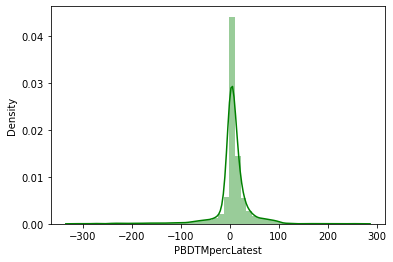

Histogram of CPMpercLatest


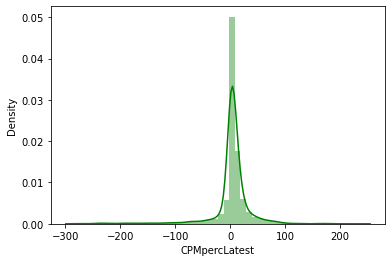

Histogram of APATMpercLatest


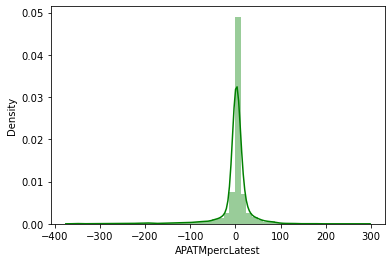

Histogram of DebtorsVelocityDays


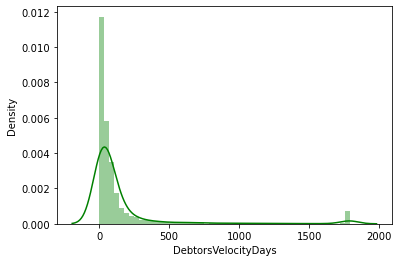

Histogram of CreditorsVelocityDays


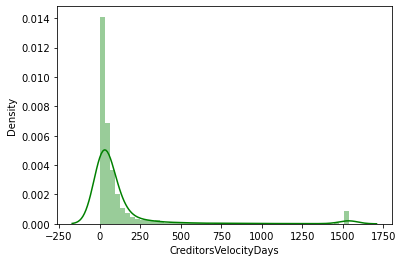

Histogram of InventoryVelocityDays


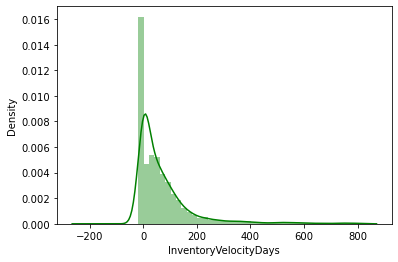

Histogram of ValueofOutputtoTotalAssets


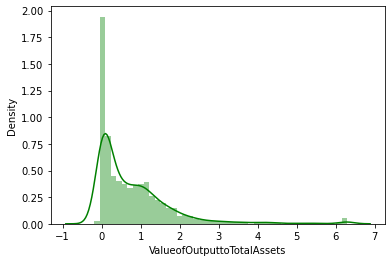

Histogram of ValueofOutputtoGrossBlock


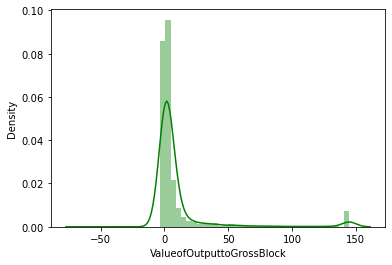

Histogram of default


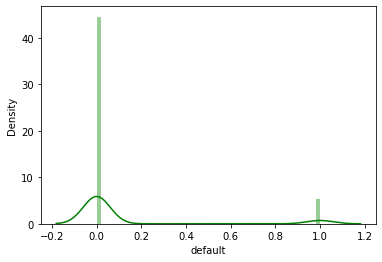

In [66]:
for x in lstnumericcolumns:
    univariateAnalysis(x)

# BIVARIATE ANALYSIS

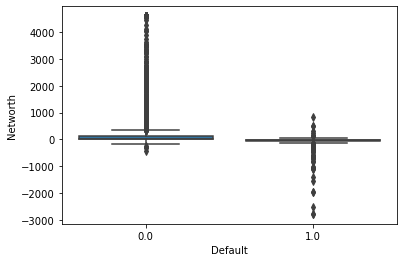

In [67]:
sns.boxplot(x=df2['default'],y=df2['Networth'])
plt.xlabel('Default');

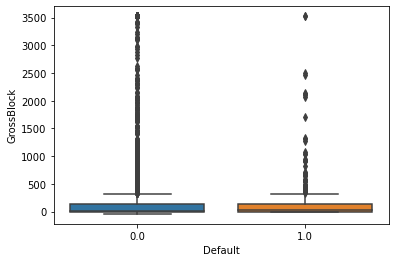

In [68]:
sns.boxplot(x=df2['default'],y=df2['GrossBlock'])
plt.xlabel('Default');

Text(0.5, 0, 'Default')

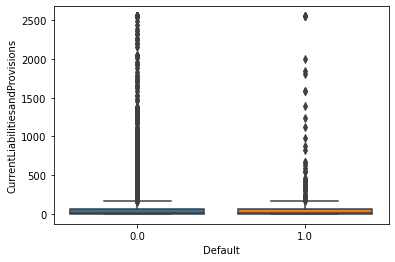

In [69]:
sns.boxplot(x=df2['default'],y=df2['CurrentLiabilitiesandProvisions'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

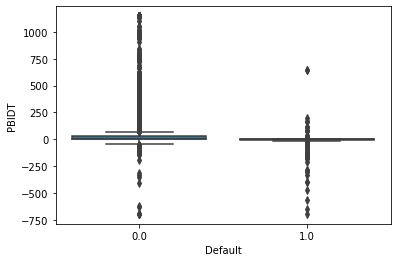

In [70]:
sns.boxplot(x=df2['default'],y=df2['PBIDT'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

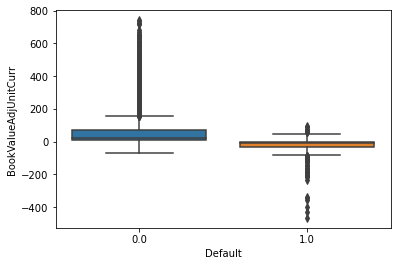

In [71]:
sns.boxplot(x=df2['default'],y=df2['BookValueAdjUnitCurr'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

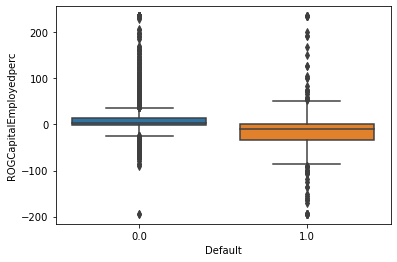

In [72]:
sns.boxplot(x=df2['default'],y=df2['ROGCapitalEmployedperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

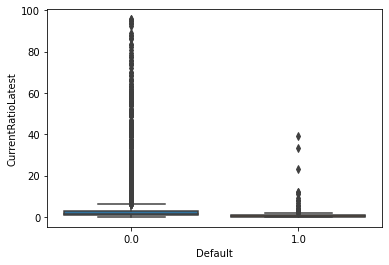

In [73]:
sns.boxplot(x=df2['default'],y=df2['CurrentRatioLatest'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

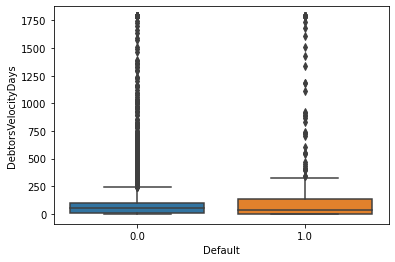

In [74]:
sns.boxplot(x=df2['default'],y=df2['DebtorsVelocityDays'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

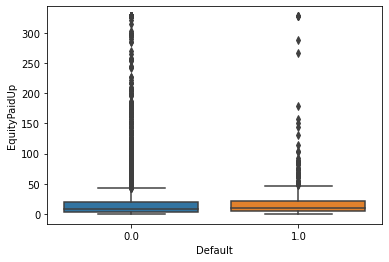

In [75]:
sns.boxplot(x=df2['default'],y=df2['EquityPaidUp'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

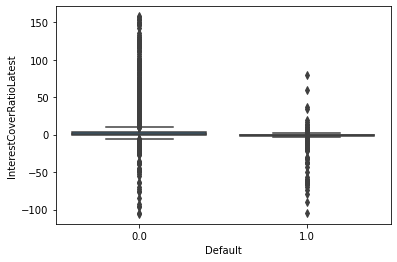

In [76]:
sns.boxplot(x=df2['default'],y=df2['InterestCoverRatioLatest'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

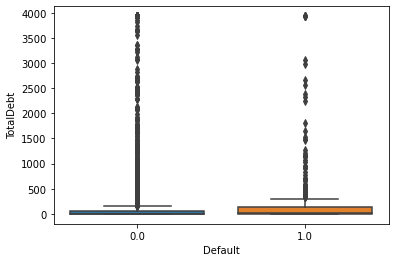

In [77]:
sns.boxplot(x=df2['default'],y=df2['TotalDebt'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

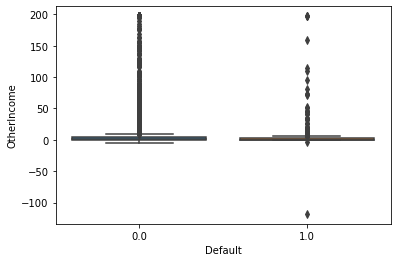

In [78]:
sns.boxplot(x=df2['default'],y=df2['OtherIncome'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

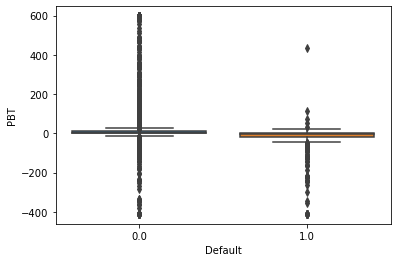

In [79]:
sns.boxplot(x=df2['default'],y=df2['PBT'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

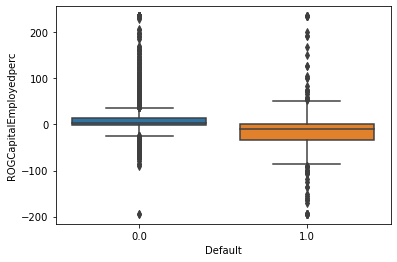

In [80]:
sns.boxplot(x=df2['default'],y=df2['ROGCapitalEmployedperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

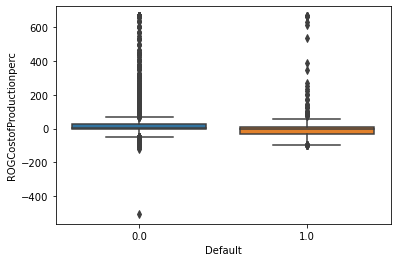

In [81]:
sns.boxplot(x=df2['default'],y=df2['ROGCostofProductionperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

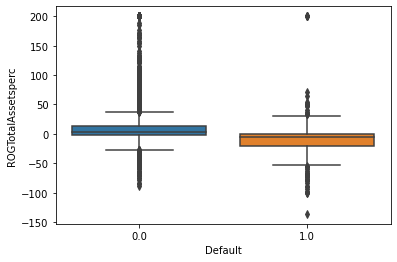

In [82]:
sns.boxplot(x=df2['default'],y=df2['ROGTotalAssetsperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

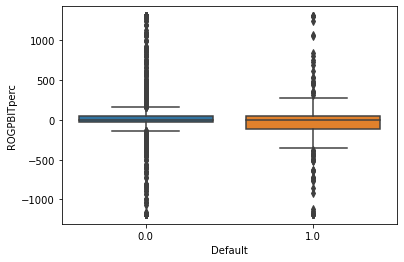

In [83]:
sns.boxplot(x=df2['default'],y=df2['ROGPBITperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

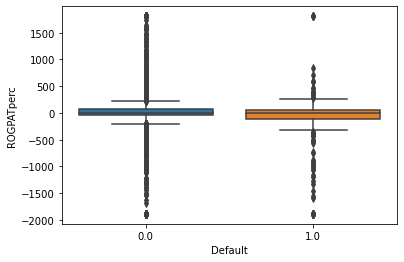

In [84]:
sns.boxplot(x=df2['default'],y=df2['ROGPATperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

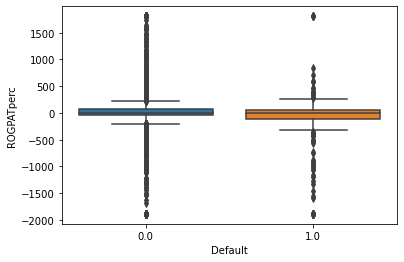

In [85]:
sns.boxplot(x=df2['default'],y=df2['ROGPATperc'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

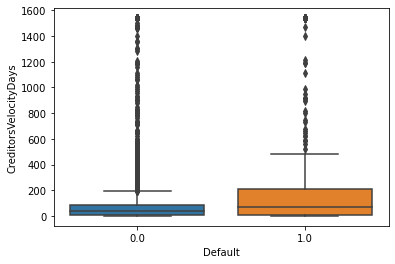

In [86]:
sns.boxplot(x=df2['default'],y=df2['CreditorsVelocityDays'])
plt.xlabel('Default')

Text(0.5, 0, 'Default')

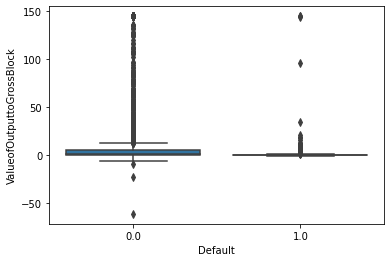

In [87]:
sns.boxplot(x=df2['default'],y=df2['ValueofOutputtoGrossBlock'])
plt.xlabel('Default')

In [88]:
import statsmodels.formula.api as SM

In [89]:
df2.columns.value_counts()

CoCode                             1
CurrentRatioLatest                 1
ROGGrossBlockperc                  1
ROGGrossSalesperc                  1
ROGNetSalesperc                    1
                                  ..
BookValueAdjUnitCurr               1
MarketCapitalisation               1
CEPSannualisedUnitCurr             1
CashFlowFromOperatingActivities    1
default                            1
Length: 66, dtype: int64

In [90]:
df2.columns

Index(['CoCode', 'EquityPaidUp', 'Networth', 'CapitalEmployed', 'TotalDebt',
       'GrossBlock', 'NetWorkingCapital', 'CurrentAssets',
       'CurrentLiabilitiesandProvisions', 'TotalAssetstoLiabilities',
       'GrossSales', 'NetSales', 'OtherIncome', 'ValueOfOutput',
       'CostofProduction', 'SellingCost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'AdjustedPAT', 'CP', 'Revenueearningsinforex',
       'Revenueexpensesinforex', 'Capitalexpensesinforex', 'BookValueUnitCurr',
       'BookValueAdjUnitCurr', 'MarketCapitalisation',
       'CEPSannualisedUnitCurr', 'CashFlowFromOperatingActivities',
       'CashFlowFromInvestingActivities', 'CashFlowFromFinancingActivities',
       'ROGNetWorthperc', 'ROGCapitalEmployedperc', 'ROGGrossBlockperc',
       'ROGGrossSalesperc', 'ROGNetSalesperc', 'ROGCostofProductionperc',
       'ROGTotalAssetsperc', 'ROGPBIDTperc', 'ROGPBDTperc', 'ROGPBITperc',
       'ROGPBTperc', 'ROGPATperc', 'ROGCPperc',
       'ROGRevenueearningsinforexperc', 'ROG

In [91]:
# f_1 = 'default ~ EquityPaidUp+Networth+CapitalEmployed+TotalDebt+GrossBlock+NetWorkingCapital+CurrentAssets+CurrentLiabilitiesandProvisions+TotalAssetstoLiabilities+GrossSales+NetSales+OtherIncome+ValueOfOutput+CostofProduction+SellingCost+PBIDT+PBDT+PBIT+PBT+PAT+AdjustedPAT+CP+Revenueearningsinforex+Revenueexpensesinforex+BookValueUnitCurr+BookValueAdjUnitCurr+MarketCapitalisation+CEPSannualisedUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+CashFlowFromFinancingActivities+ROGNetWorthperc+ROGCapitalEmployedperc+ROGGrossBlockperc+ROGGrossSalesperc+ROGNetSalesperc+ROGCostofProductionperc+ROGTotalAssetsperc+ROGPBIDTperc+ROGPBDTperc+ROGPBITperc+ROGPBTperc+ROGPATperc+ROGCPperc+ROGMarketCapitalisationperc+CurrentRatioLatest+FixedAssetsRatioLatest+InventoryRatioLatest+DebtorsRatioLatest+TotalAssetTurnoverRatioLatest+InterestCoverRatioLatest+PBIDTMpercLatest+PBITMpercLatest+PBDTMpercLatest+CPMpercLatest+APATMpercLatest+DebtorsVelocityDays+CreditorsVelocityDays+InventoryVelocityDays+ValueofOutputtoTotalAssets+ValueofOutputtoGrossBlock'

In [92]:
# model_1 = SM.logit(formula =f_1,data=Default2).fit()

In [93]:
# model_1.summary()

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

<AxesSubplot:>

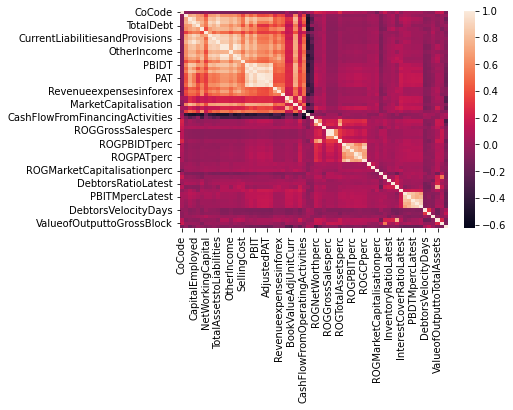

In [95]:
sns.heatmap(df2.corr())

## VIF <5 feature Loop

In [96]:
X = df2.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False).head()

,variables,VIF
11,NetSales,4038.65
37,ROGNetSalesperc,3226.48
36,ROGGrossSalesperc,3225.54
13,ValueOfOutput,2077.94
10,GrossSales,1799.88


In [97]:
X = df2.drop('default', axis = 1)
loop_df=calc_vif(X).sort_values(by = 'VIF', ascending = False)

vi=list(loop_df["VIF"])
vr=list(loop_df["variables"])



In [98]:
while vi[0]>5:
    
    loop_df=calc_vif(X).sort_values(by = 'VIF', ascending = False)
    vi=list(loop_df["VIF"])
    vr=list(loop_df["variables"])
    X = X.drop(vr[0], axis = 1)
    loop_df=calc_vif(X).sort_values(by = 'VIF', ascending = False)
    vi=list(loop_df["VIF"])
    vr=list(loop_df["variables"])

In [99]:
loop_df

,variables,VIF
10,BookValueUnitCurr,4.63
41,ValueofOutputtoTotalAssets,4.56
23,ROGPBIDTperc,4.23
34,TotalAssetTurnoverRatioLatest,4.20
24,ROGPBITperc,3.75
14,CashFlowFromOperatingActivities,3.72
12,MarketCapitalisation,3.70
26,ROGCPperc,3.56
2,TotalDebt,3.29
13,CEPSannualisedUnitCurr,3.22


In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CoCode                           3586 non-null   float64
 1   EquityPaidUp                     3586 non-null   float64
 2   TotalDebt                        3586 non-null   float64
 3   NetWorkingCapital                3586 non-null   float64
 4   OtherIncome                      3586 non-null   float64
 5   SellingCost                      3586 non-null   float64
 6   AdjustedPAT                      3586 non-null   float64
 7   Revenueearningsinforex           3586 non-null   float64
 8   Revenueexpensesinforex           3586 non-null   float64
 9   Capitalexpensesinforex           3586 non-null   float64
 10  BookValueUnitCurr                3586 non-null   float64
 11  BookValueAdjUnitCurr             3586 non-null   float64
 12  MarketCapitalisation

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
y = df2['default']

In [103]:
df2["default"].value_counts(normalize=True)

0.00   0.89
1.00   0.11
Name: default, dtype: float64

<AxesSubplot:xlabel='default', ylabel='count'>

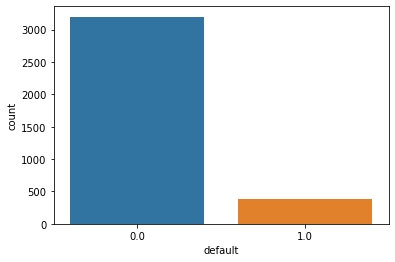

In [104]:
sns.countplot(df2["default"])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [106]:
print("No. of rows and columns in X_train: ",X_train.shape)
print("No. of rows and columns in y_train: ",y_train.shape)
print("No. of rows and columns in X_test: ",X_test.shape)
print("No. of rows and columns in y_test: ",y_test.shape)

No. of rows and columns in X_train:  (2402, 43)
No. of rows and columns in y_train:  (2402,)
No. of rows and columns in X_test:  (1184, 43)
No. of rows and columns in y_test:  (1184,)


In [107]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [108]:
print("No. of rows and columns in df_train: ",df_train.shape)
print("No. of rows and columns in df_test: ",df_test.shape)

No. of rows and columns in df_train:  (2402, 44)
No. of rows and columns in df_test:  (1184, 44)


In [109]:
df_train["default"].value_counts(normalize=True)

0.00   0.90
1.00   0.10
Name: default, dtype: float64

In [110]:
df_test["default"].value_counts(normalize=True)

0.00   0.88
1.00   0.12
Name: default, dtype: float64

# Model 1

In [111]:
import statsmodels.formula.api as SM
f_1='default ~ TotalDebt+NetWorkingCapital+OtherIncome+SellingCost+AdjustedPAT+Revenueearningsinforex+Revenueexpensesinforex+Capitalexpensesinforex+BookValueUnitCurr+BookValueAdjUnitCurr+MarketCapitalisation+CEPSannualisedUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+CashFlowFromFinancingActivities+ROGNetWorthperc+ROGCapitalEmployedperc+ROGGrossBlockperc+ROGGrossSalesperc+ROGCostofProductionperc+ROGTotalAssetsperc+ROGPBIDTperc+ROGPBITperc+ROGPATperc+ROGCPperc+ROGRevenueearningsinforexperc+ROGRevenueexpensesinforexperc+ROGMarketCapitalisationperc+CurrentRatioLatest+FixedAssetsRatioLatest+InventoryRatioLatest+DebtorsRatioLatest+TotalAssetTurnoverRatioLatest+InterestCoverRatioLatest+PBIDTMpercLatest+APATMpercLatest+DebtorsVelocityDays+CreditorsVelocityDays+InventoryVelocityDays+ValueofOutputtoTotalAssets+ValueofOutputtoGrossBlock'

In [112]:
f_1

'default ~ TotalDebt+NetWorkingCapital+OtherIncome+SellingCost+AdjustedPAT+Revenueearningsinforex+Revenueexpensesinforex+Capitalexpensesinforex+BookValueUnitCurr+BookValueAdjUnitCurr+MarketCapitalisation+CEPSannualisedUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+CashFlowFromFinancingActivities+ROGNetWorthperc+ROGCapitalEmployedperc+ROGGrossBlockperc+ROGGrossSalesperc+ROGCostofProductionperc+ROGTotalAssetsperc+ROGPBIDTperc+ROGPBITperc+ROGPATperc+ROGCPperc+ROGRevenueearningsinforexperc+ROGRevenueexpensesinforexperc+ROGMarketCapitalisationperc+CurrentRatioLatest+FixedAssetsRatioLatest+InventoryRatioLatest+DebtorsRatioLatest+TotalAssetTurnoverRatioLatest+InterestCoverRatioLatest+PBIDTMpercLatest+APATMpercLatest+DebtorsVelocityDays+CreditorsVelocityDays+InventoryVelocityDays+ValueofOutputtoTotalAssets+ValueofOutputtoGrossBlock'

In [113]:
model_1 = SM.logit(formula = f_1,data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.112587
         Iterations 13


In [114]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2360
Method:                           MLE   Df Model:                           41
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.6583
Time:                        13:06:35   Log-Likelihood:                -270.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.079e-191
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.3532      0.218     -1.620      0.105      -0.781       0.074
TotalDebt                           0.0006      0.001      1.109      0.268      -0.000       0.002
NetWorkingCapital               -9.279e-05      0.001     -0.092      0.927      -0.002       0.002
OtherIncome                        -0.0122      0.010     -1.236      0.217      -0.032       0.007
SellingCost                         0.0119      0.013      0.884      0.377      -0.014       0.038
AdjustedPAT                        -0.0002      0.005     -0.052      0.958      -0.009       0.009
Revenueearningsinforex             -0.0028      0.003     -1.032      0.302      -0.008       0.002
Revenueexpensesinforex              0.0037      0.003      1.448      0.148      -0.001       0.009
Capitalexpensesinforex              0.0409      0.066      0.616      0.538      -0.089       0.171
BookValueUnitCurr                  -0.1044      0.040     -2.616      0.009      -0.183      -0.026
BookValueAdjUnitCurr               -0.0204      0.041     -0.504      0.614      -0.100       0.059
MarketCapitalisation               -0.0006      0.000     -1.252      0.211      -0.002       0.000
CEPSannualisedUnitCurr             -0.0048      0.017     -0.282      0.778      -0.038       0.029
CashFlowFromOperatingActivities    -0.0121      0.005     -2.396      0.017      -0.022      -0.002
CashFlowFromInvestingActivities    -0.0103      0.006     -1.861      0.063      -0.021       0.001
CashFlowFromFinancingActivities    -0.0023      0.005     -0.445      0.656      -0.013       0.008
ROGNetWorthperc                    -0.0106      0.002     -4.558      0.000      -0.015      -0.006
ROGCapitalEmployedperc              0.0037      0.003      1.224      0.221      -0.002       0.010
ROGGrossBlockperc                   0.0033      0.003      0.935      0.350      -0.004       0.010
ROGGrossSalesperc                  -0.0003      0.001     -0.273      0.785      -0.003       0.002
ROGCostofProductionperc            -0.0004      0.001     -0.324      0.746      -0.003       0.002
ROGTotalAssetsperc                 -0.0034      0.005     -0.662      0.508      -0.014       0.007
ROGPBIDTperc                        0.0009      0.001      1.209      0.227      -0.001       0.002
ROGPBITperc                     -1.749e-05      0.001     -0.028      0.978      -0.001       0.001
ROGPATperc                          0.0008      0.000      1.903      0.057   -2.25e-05       0.002
ROGCPperc                          -0.0015      0.001     -2.277      0.023      -0.003      -0.000
ROGRevenueearningsinforexperc      -0.0019      0.004     -0.483      0.629      -0.009       0.006
ROGRevenueexpensesinforexperc      -0.0040      0.003     -1.495      0.135      -0.009       0.001
ROGMarketCapitalisationperc         0.0002      0.001      0.190      0.849      -0.002       0.002
CurrentRatioLatest                 -0.361

# Model 2

In [219]:
f_2='default ~ BookValueUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+ROGNetWorthperc+ROGPATperc+ROGCPperc+CurrentRatioLatest+FixedAssetsRatioLatest+DebtorsRatioLatest+PBIDTMpercLatest'
f_2

'default ~ BookValueUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+ROGNetWorthperc+ROGPATperc+ROGCPperc+CurrentRatioLatest+FixedAssetsRatioLatest+DebtorsRatioLatest+PBIDTMpercLatest'

In [220]:
model_2 = SM.logit(formula = f_2,data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.119110
         Iterations 11


In [221]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.6385
Time:                        17:58:16   Log-Likelihood:                -286.10
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.032e-210
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.3438      0.161     -2.139      0.032      -0.659      -0.029
BookValueUnitCurr                  -0.1154      0.011    -10.953      0.000      -0.136      -0.095
CashFlowFromOperatingActivities    -0.0090      0.002     -4.092      0.000      -0.013      -0.005
CashFlowFromInvestingActivities    -0.0106      0.003     -3.890      0.000      -0.016      -0.005
ROGNetWorthperc                    -0.0115      0.002     -5.350      0.000      -0.016      -0.007
ROGPATperc                          0.0008      0.000      2.233      0.026     9.2e-05       0.001
ROGCPperc                          -0.0009      0.000     -1.824      0.068      -0.002    6.37e-05
CurrentRatioLatest                 -0.3881      0.077     -5.014      0.000      -0.540      -0.236
FixedAssetsRatioLatest             -0.0586      0.025     -2.341      0.019      -0.108      -0.010
DebtorsRatioLatest                 -0.0320      0.013     -2.374      0.018      -0.058      -0.006
PBIDTMpercLatest                   -0.0125      0.003     -4.515      0.000      -0.018      -0.007
===================================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [222]:
y_prob_pred_train = model_2.predict(df_train)
y_prob_pred_train.head()

662    0.00
1373   0.00
3268   0.00
3246   0.00
1456   0.00
dtype: float64

In [223]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

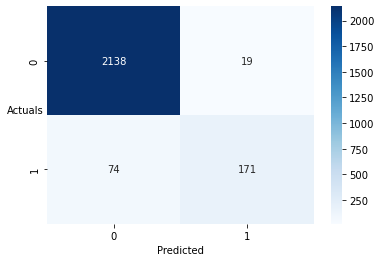

In [224]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [225]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.967     0.991     0.979      2157
         1.0      0.900     0.698     0.786       245

    accuracy                          0.961      2402
   macro avg      0.933     0.845     0.882      2402
weighted avg      0.960     0.961     0.959      2402



## Optimal Threshold on Model 2

In [226]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(df_train['default'],y_prob_pred_train)
print('Area under Curve is', roc_auc_score(df_train['default'],y_prob_pred_train))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("optimal_threshold: ",optimal_threshold)

Area under Curve is 0.9701115494876671
optimal_threshold:  0.1677687807258008


### Predicting with threshold as 0.15

In [227]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.15:
        a=1
    else:
        a=0
    y_class_pred.append(a)

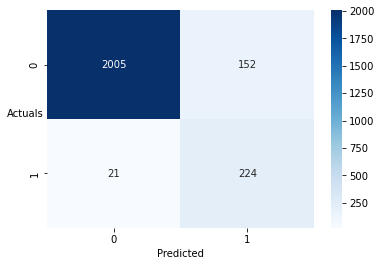

In [228]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [229]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.990     0.930     0.959      2157
         1.0      0.596     0.914     0.721       245

    accuracy                          0.928      2402
   macro avg      0.793     0.922     0.840      2402
weighted avg      0.949     0.928     0.934      2402



AUC: 0.970


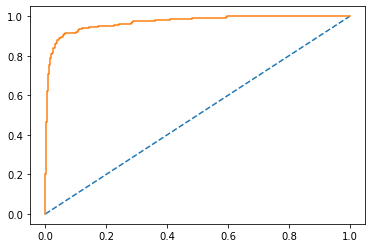

In [234]:
# predict probabilities
probs =model_2.predict()
# keep probabilities for the positive outcome only

# calculate AUC
cart_train_auc = roc_auc_score(df_train["default"], probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(df_train["default"], probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## Prediction on Test set


In [126]:
y_prob_pred_test = model_2.predict(df_test)
y_prob_pred_test.head()

3163   0.01
3133   0.00
937    0.34
196    0.42
2852   0.04
dtype: float64

In [127]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

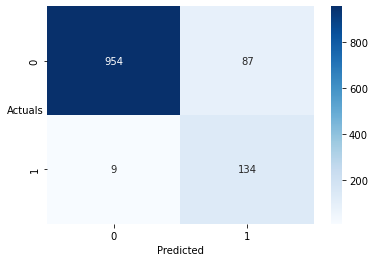

In [128]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [129]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.991     0.916     0.952      1041
         1.0      0.606     0.937     0.736       143

    accuracy                          0.919      1184
   macro avg      0.798     0.927     0.844      1184
weighted avg      0.944     0.919     0.926      1184



AUC: 0.960


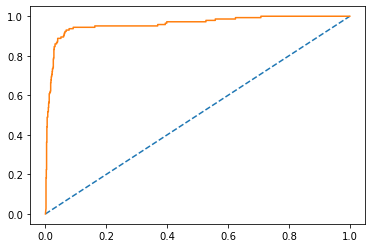

In [235]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob_pred_test = model_2.predict(df_test)
# keep probabilities for the positive outcome only

fpr, tpr, thresholds = roc_curve(df_test['default'],y_prob_pred_test)
# calculate AUC
cart_test_auc = roc_auc_score(df_test["default"], y_prob_pred_test)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(df_test['default'],y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr)

In [130]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))


The adjusted pseudo R-square value is 0.6258240821097024


# LOGIT BY USING SMOTE

In [236]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [237]:
train_smote = pd.concat([X_res, y_res], axis = 1)

In [238]:
model_2 = SM.logit(formula ='default ~ BookValueUnitCurr+CashFlowFromOperatingActivities+CashFlowFromInvestingActivities+ROGNetWorthperc+ROGPATperc+ROGCPperc+CurrentRatioLatest+FixedAssetsRatioLatest+DebtorsRatioLatest+PBIDTMpercLatest',data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.183228
         Iterations 11


In [239]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3774
Model:                          Logit   Df Residuals:                     3763
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.7317
Time:                        18:02:28   Log-Likelihood:                -691.50
converged:                       True   LL-Null:                       -2577.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.3832      0.111     12.494      0.000       1.166       1.600
BookValueUnitCurr                  -0.1323      0.007    -19.948      0.000      -0.145      -0.119
CashFlowFromOperatingActivities    -0.0145      0.001    -10.075      0.000      -0.017      -0.012
CashFlowFromInvestingActivities    -0.0142      0.002     -7.947      0.000      -0.018      -0.011
ROGNetWorthperc                    -0.0131      0.002     -7.995      0.000      -0.016      -0.010
ROGPATperc                          0.0010      0.000      3.729      0.000       0.000       0.001
ROGCPperc                          -0.0008      0.000     -2.247      0.025      -0.001   -9.94e-05
CurrentRatioLatest                 -0.4760      0.046    -10.408      0.000      -0.566      -0.386
FixedAssetsRatioLatest             -0.0374      0.010     -3.863      0.000      -0.056      -0.018
DebtorsRatioLatest                 -0.0346      0.009     -3.875      0.000      -0.052      -0.017
PBIDTMpercLatest                   -0.0207      0.003     -8.045      0.000      -0.026      -0.016
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [240]:
y_prob_pred_train = model_2.predict(train_smote)
y_prob_pred_train.head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.01
dtype: float64

In [241]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

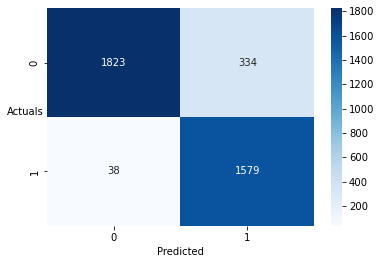

In [242]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(train_smote['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [243]:
print(metrics.classification_report(train_smote['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.980     0.845     0.907      2157
         1.0      0.825     0.976     0.895      1617

    accuracy                          0.901      3774
   macro avg      0.902     0.911     0.901      3774
weighted avg      0.914     0.901     0.902      3774



AUC: 0.960


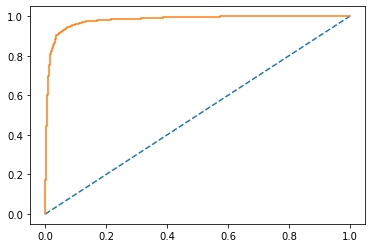

In [246]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob_pred_train = model_2.predict(train_smote)
# keep probabilities for the positive outcome only

fpr, tpr, thresholds = roc_curve(train_smote['default'],y_prob_pred_train)
# calculate AUC
cart_train_auc = roc_auc_score(train_smote["default"], y_prob_pred_train)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(train_smote['default'],y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr)

In [139]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(train_smote['default'],y_prob_pred_train)
print('Area under Curve is', roc_auc_score(train_smote['default'],y_prob_pred_train))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("optimal_threshold: ",optimal_threshold)

Area under Curve is 0.980808338845295
optimal_threshold:  0.44180105000594244


## Validating on test set

In [140]:
y_prob_pred_test = model_2.predict(df_test)
y_prob_pred_test.head()

3163   0.03
3133   0.00
937    0.63
196    0.83
2852   0.11
dtype: float64

In [141]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

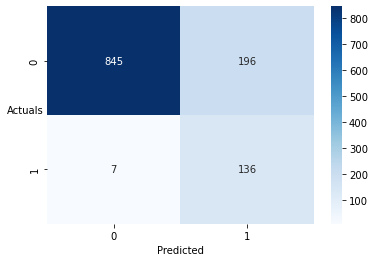

In [142]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [143]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.992     0.812     0.893      1041
         1.0      0.410     0.951     0.573       143

    accuracy                          0.829      1184
   macro avg      0.701     0.881     0.733      1184
weighted avg      0.921     0.829     0.854      1184



AUC: 0.957


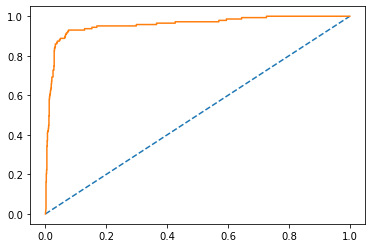

In [247]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob_pred_test = model_2.predict(X_test)
# keep probabilities for the positive outcome only

fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred_test)
# calculate AUC
cart_test_auc = roc_auc_score(y_test, y_prob_pred_test)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr)

## LDA MODEL

In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [145]:
LDA = LinearDiscriminantAnalysis()

In [146]:
lda_model = LDA.fit(X_train, y_train)

In [147]:
X_train.shape

(2402, 43)

In [148]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [149]:
y_class_pred=[]
for i in range(0,len(pred_train_lda)):
    if np.array(pred_train_lda)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

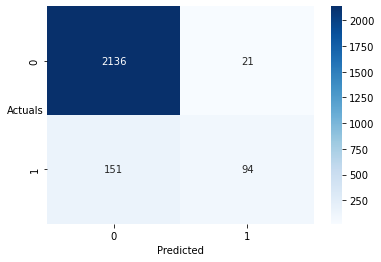

In [150]:
sns.heatmap((metrics.confusion_matrix(y_train, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [151]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2157
         1.0       0.82      0.38      0.52       245

    accuracy                           0.93      2402
   macro avg       0.88      0.69      0.74      2402
weighted avg       0.92      0.93      0.92      2402



AUC: 0.916


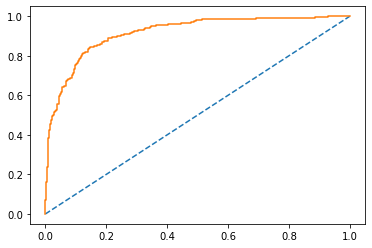

In [152]:
# predict probabilities
probs =lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [153]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [154]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)


## Validate LDA model on test

In [155]:
y_class_pred=[]
for i in range(0,len(pred_test_lda)):
    if np.array(pred_test_lda)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

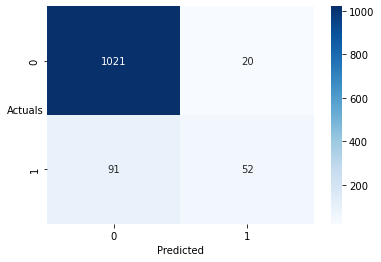

In [156]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [157]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1041
         1.0       0.72      0.36      0.48       143

    accuracy                           0.91      1184
   macro avg       0.82      0.67      0.72      1184
weighted avg       0.89      0.91      0.89      1184



AUC: 0.891


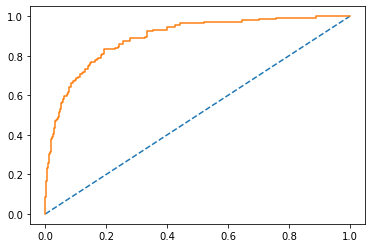

In [158]:
# predict probabilities
probs =lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## Lda on smote data


In [159]:
lda_model = LDA.fit(X_res, y_res)

In [160]:
pred_train_lda = lda_model.predict(X_res)
pred_tes t_lda = lda_model.predict(X_test)

In [161]:
y_class_pred=[]
for i in range(0,len(pred_train_lda)):
    if np.array(pred_train_lda)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

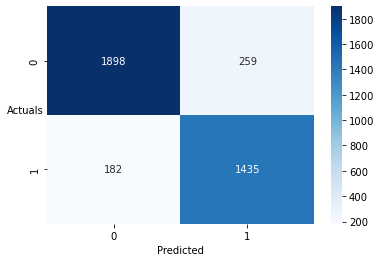

In [162]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [163]:
print(metrics.classification_report(y_res, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      2157
         1.0       0.85      0.89      0.87      1617

    accuracy                           0.88      3774
   macro avg       0.88      0.88      0.88      3774
weighted avg       0.88      0.88      0.88      3774



AUC: 0.946


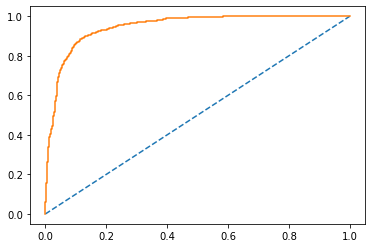

In [164]:
# predict probabilities
probs =lda_model.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [165]:
pred_train_lda_prob = lda_model.predict_proba(X_res)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [166]:
fpr, tpr, thresholds = roc_curve(y_res,pred_train_lda_prob)

In [167]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5040296266305163

# Validate on LDA SMOTE Model test data

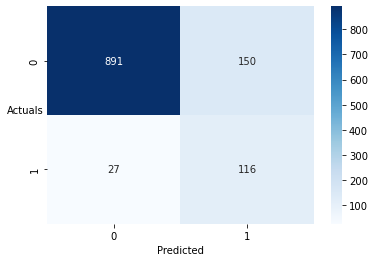

In [170]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [171]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1041
         1.0       0.44      0.81      0.57       143

    accuracy                           0.85      1184
   macro avg       0.70      0.83      0.74      1184
weighted avg       0.91      0.85      0.87      1184



AUC: 0.911


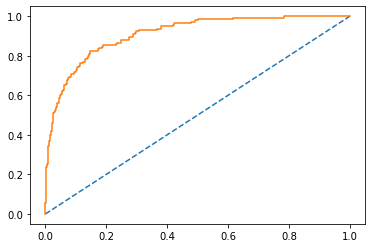

In [172]:
# predict probabilities
probs =lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

# RANDOM CLASSIFIER MODEL WITHOUT SMOTE

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [100, 200]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [174]:
param_grid

{'max_depth': [3, 5, 7],
 'min_samples_leaf': [5, 10, 15],
 'min_samples_split': [15, 30, 45],
 'n_estimators': [100, 200]}

In [175]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200]})

In [176]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 200}

In [177]:
best_grid = grid_search.best_estimator_

In [178]:
best_grid.feature_importances_

array([6.60381132e-03, 2.20163071e-03, 5.75226235e-03, 2.70755384e-02,
       1.41079827e-03, 8.88965244e-04, 3.06623295e-02, 4.75030672e-04,
       1.28040478e-03, 2.39043609e-04, 3.11265569e-01, 3.26912313e-01,
       2.91169624e-03, 4.42945284e-02, 2.56561624e-03, 4.20965877e-03,
       1.46466148e-03, 5.45705571e-02, 2.59317409e-02, 2.15813994e-03,
       2.18223755e-03, 3.08750307e-03, 7.06448484e-03, 3.61821772e-03,
       1.36204818e-03, 1.64121289e-03, 2.69877270e-03, 1.12885132e-03,
       1.27708828e-03, 1.38959612e-03, 5.36941636e-02, 4.92620680e-03,
       1.08094568e-03, 9.57484753e-04, 1.39272151e-02, 7.37287326e-03,
       1.20314643e-02, 1.01381413e-02, 1.12731751e-03, 1.79582271e-03,
       1.33130428e-03, 4.83926533e-03, 8.45348649e-03])

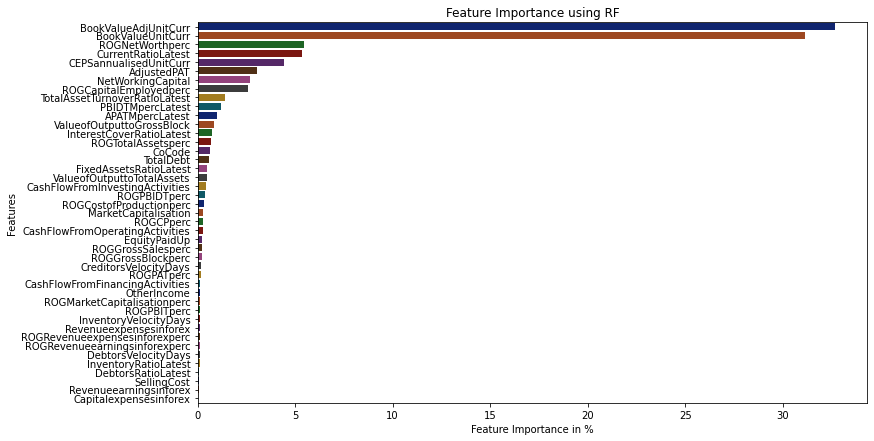

In [179]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [180]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [181]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2157
         1.0       0.93      0.86      0.89       245

    accuracy                           0.98      2402
   macro avg       0.95      0.93      0.94      2402
weighted avg       0.98      0.98      0.98      2402



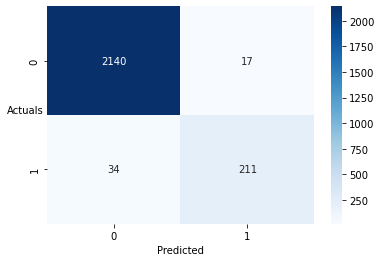

In [182]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.997


Text(0.5, 1.0, 'Train Data Random forest Without SMOTE')

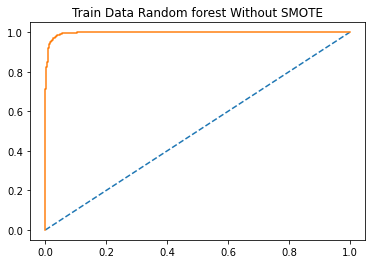

In [183]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# # keep probabilities for the positive outcome only
probs = probs[:, 1]
 # calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title("Train Data Random forest Without SMOTE")


## Validate on RF Model on test data

In [184]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1041
         1.0       0.93      0.90      0.91       143

    accuracy                           0.98      1184
   macro avg       0.96      0.95      0.95      1184
weighted avg       0.98      0.98      0.98      1184



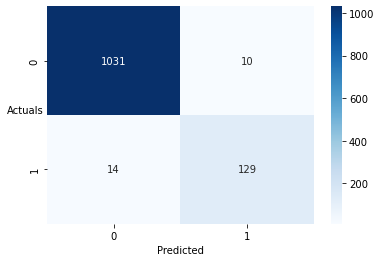

In [185]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.991


Text(0.5, 1.0, 'Test Data Random forest Without SMOTE')

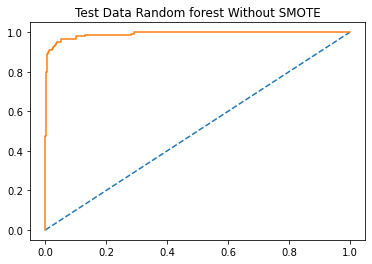

In [186]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# # keep probabilities for the positive outcome only
probs = probs[:, 1]
 # calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.title("Test Data Random forest Without SMOTE")


## RANDOM CLASSIFIER MODEL WITH SMOTE

In [187]:
grid_search.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200]})

In [188]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 200}

In [189]:
best_grid = grid_search.best_estimator_

In [190]:
pred_train_rf = best_grid.predict(X_res)
pred_test_rf = best_grid.predict(X_test)

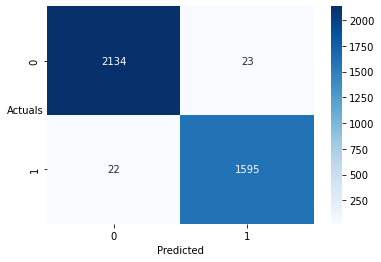

In [191]:
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [192]:
print(metrics.classification_report(y_res, pred_train_rf,digits=3))

              precision    recall  f1-score   support

         0.0      0.990     0.989     0.990      2157
         1.0      0.986     0.986     0.986      1617

    accuracy                          0.988      3774
   macro avg      0.988     0.988     0.988      3774
weighted avg      0.988     0.988     0.988      3774



AUC: 0.999


Text(0.5, 1.0, 'Train Data Random forest With SMOTE')

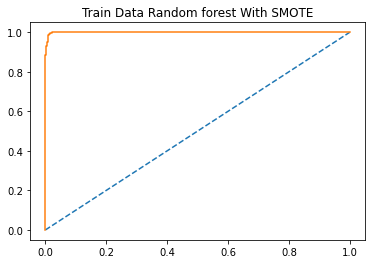

In [193]:
# predict probabilities
probs = best_grid.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title("Train Data Random forest With SMOTE")

## Predicting on RF Smote model test data

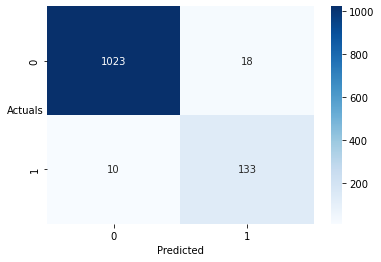

In [194]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [195]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1041
         1.0       0.88      0.93      0.90       143

    accuracy                           0.98      1184
   macro avg       0.94      0.96      0.95      1184
weighted avg       0.98      0.98      0.98      1184



AUC: 0.992


Text(0.5, 1.0, 'Test Data Random forest With SMOTE')

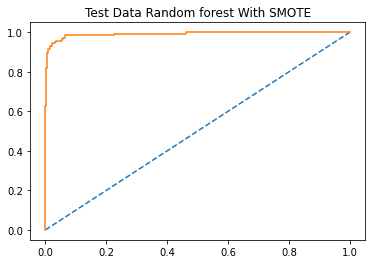

In [196]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title("Test Data Random forest With SMOTE")

# PROBLEM 2

In [197]:
!pip install tabulate
!pip install iexfinance
!pip install datetime

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [199]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [200]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [201]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [202]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])


The number of rows (observations) is 314 
The number of columns (variables) is 11


In [203]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [204]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,511.34,114.56,636.68,540.74,59.10,14806.41,633.47,147.63,53.71,372.66
std,135.95,22.51,102.88,115.84,15.81,4288.28,171.86,65.88,31.25,202.26
min,234.00,64.00,284.00,263.00,21.00,5543.00,338.00,53.00,3.00,14.00
25%,424.00,96.00,572.00,470.50,47.00,10952.25,478.50,88.25,25.25,243.25
50%,466.50,115.00,625.00,528.00,57.00,16018.50,614.00,142.50,53.00,376.00
75%,630.75,134.00,678.00,605.25,71.75,17773.25,785.00,182.75,82.00,534.00
max,810.00,157.00,956.00,808.00,104.00,24806.00,1089.00,338.00,117.00,871.00


Text(0.5, 1.0, 'Sun_Pharma over the years')

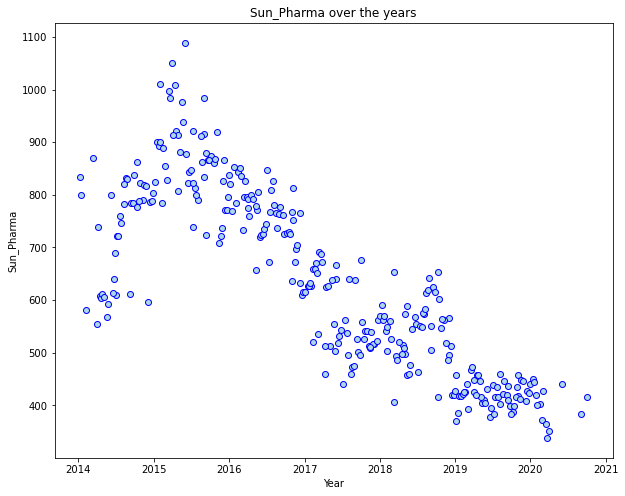

In [205]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Sun_Pharma'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Sun_Pharma over the years')

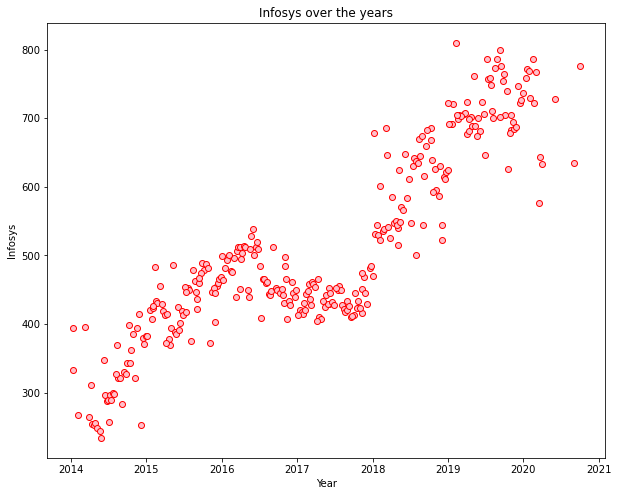

In [250]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

# Analyzing returns
Steps for calculating returns from prices:

Take logarithms
Take differences

In [207]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [208]:
stock_returns.shape

(314, 10)

In [251]:
stock_returns.head(10)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15
5,-0.03,-0.02,0.04,0.06,0.06,0.01,-0.01,0.02,0.01,-0.02
6,0.02,0.06,0.01,0.08,0.11,0.07,-0.02,0.10,0.05,0.02
7,-0.04,0.20,0.04,0.06,0.14,0.06,-0.05,0.11,-0.02,0.17
8,-0.04,-0.01,0.06,-0.01,-0.02,0.05,0.04,-0.01,-0.01,-0.18
9,0.14,0.08,-0.00,0.07,0.21,0.11,-0.02,0.13,0.02,0.07


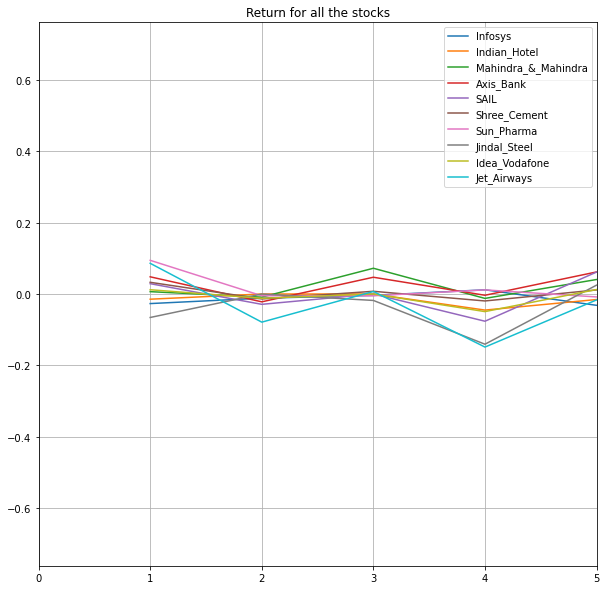

In [254]:
plt.figure(figsize=(10,10))
plt.plot(stock_returns['Infosys'], label='Infosys')
plt.plot(stock_returns['Indian_Hotel'], label='Indian_Hotel')
plt.plot(stock_returns['Mahindra_&_Mahindra'], label='Mahindra_&_Mahindra')
plt.plot(stock_returns['Axis_Bank'], label='Axis_Bank')
plt.plot(stock_returns['SAIL'], label='SAIL')
plt.plot(stock_returns['Shree_Cement'], label='Shree_Cement')
plt.plot(stock_returns['Sun_Pharma'], label='Sun_Pharma')
plt.plot(stock_returns['Jindal_Steel'], label='Jindal_Steel')
plt.plot(stock_returns['Idea_Vodafone'], label='Idea_Vodafone')
plt.plot(stock_returns['Jet_Airways'], label='Jet_Airways')
plt.title("Return for all the stocks")
plt.legend(loc ="best")

plt.xlim(0,5)
plt.grid();

# We now look at Means & Standard Deviations of these returns
Stock Means: Average returns that the stock is making on a week to week basis
Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock
Calculating stock means

In [211]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.00
Infosys                0.00
Axis_Bank              0.00
Indian_Hotel           0.00
Sun_Pharma            -0.00
Mahindra_&_Mahindra   -0.00
SAIL                  -0.00
Jindal_Steel          -0.00
Jet_Airways           -0.01
Idea_Vodafone         -0.01
dtype: float64

In [212]:
stock_price1 =stock_prices.drop(['Date','dates'],axis=1)

In [213]:
stock_price_means = stock_price1.mean(axis = 0)
stock_price_means.sort_values(ascending=False)

Shree_Cement          14806.41
Mahindra_&_Mahindra     636.68
Sun_Pharma              633.47
Axis_Bank               540.74
Infosys                 511.34
Jet_Airways             372.66
Jindal_Steel            147.63
Indian_Hotel            114.56
SAIL                     59.10
Idea_Vodafone            53.71
dtype: float64

In [263]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone         0.10
Jet_Airways           0.10
Jindal_Steel          0.08
SAIL                  0.06
Indian_Hotel          0.05
Axis_Bank             0.05
Sun_Pharma            0.05
Mahindra_&_Mahindra   0.04
Shree_Cement          0.04
Infosys               0.04
dtype: float64

In [215]:
stock_price_sd = stock_price1.std(axis = 0)
stock_price_sd.sort_values(ascending=False)

Shree_Cement          4288.28
Jet_Airways            202.26
Sun_Pharma             171.86
Infosys                135.95
Axis_Bank              115.84
Mahindra_&_Mahindra    102.88
Jindal_Steel            65.88
Idea_Vodafone           31.25
Indian_Hotel            22.51
SAIL                    15.81
dtype: float64

In [216]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.00,0.04
Indian_Hotel,0.00,0.05
Mahindra_&_Mahindra,-0.00,0.04
Axis_Bank,0.00,0.05
SAIL,-0.00,0.06
Shree_Cement,0.00,0.04
Sun_Pharma,-0.00,0.05
Jindal_Steel,-0.00,0.08
Idea_Vodafone,-0.01,0.10
Jet_Airways,-0.01,0.10


In [217]:
df1= pd.DataFrame({'Average':stock_price_means, 'Volatility': stock_price_sd})
df1

,Average,Volatility
Infosys,511.34,135.95
Indian_Hotel,114.56,22.51
Mahindra_&_Mahindra,636.68,102.88
Axis_Bank,540.74,115.84
SAIL,59.10,15.81
Shree_Cement,14806.41,4288.28
Sun_Pharma,633.47,171.86
Jindal_Steel,147.63,65.88
Idea_Vodafone,53.71,31.25
Jet_Airways,372.66,202.26


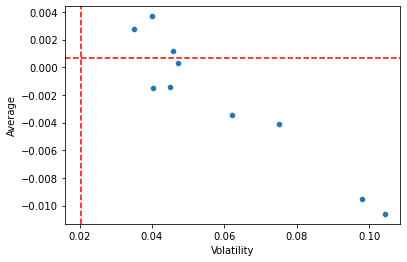

In [218]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()